# 整数の乱数を発生させるモジュール randint

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

## 1-6 の乱数を 10 個発生させる

In [3]:
from numpy.random import randint
print(randint(1, 7, 10))

[1 2 1 4 2 2 3 2 3 5]


## 1-6 の乱数を 1000 回発生させてヒストグラムに表示

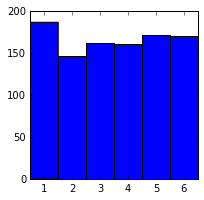

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

# 1000 回発生
dice = randint(1, 7, 1000)

fig = plt.figure(figsize=(3, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(0.5, 6.5)
subplot.hist(dice, bins=np.linspace(0.5, 6.5, 7))
plt.show()

## 2 個サイコロを振った合計を 1000 回分計算

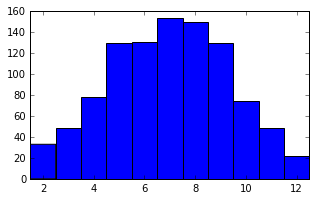

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

dice1 = randint(1, 7, 1000)
dice2 = randint(1, 7, 1000)
# これだけで配列全部の和を一気に計算できる
dice_total = dice1 + dice2

fig = plt.figure(figsize=(5, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1.5, 12.5)
subplot.hist(dice_total, bins=np.linspace(1.5, 12.5, 12))
plt.show()

## 他のモジュール: random, normal

### `random` で 0-1 の範囲の乱数を 5 個作る

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from numpy.random import normal

print(random(5))

[ 0.73232158  0.70204483  0.72211749  0.27187569  0.77859471]


### 100-150 の範囲の乱数

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from numpy.random import normal

print(100 + random(5) * 50)

[ 139.74168276  133.89724057  107.47371684  130.59561885  119.67683712]


### 正規分布の乱数 `normal`

標準偏差 1 の場合と標準偏差 2 の場合をグラフで比較.

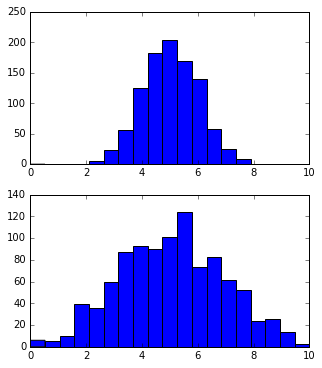

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from numpy.random import normal

fig = plt.figure(figsize=(5, 6))

# 標準偏差 1
subplot = fig.add_subplot(2, 1, 1)
data = normal(5, 1, 1000)
subplot.hist(data, bins=np.linspace(0, 10, 20))

# 標準偏差 2
subplot = fig.add_subplot(2, 1, 2)
data = normal(5, 2, 1000)
subplot.hist(data, bins=np.linspace(0, 10, 20))

plt.show()

# 大数の法則

1000 回分のサイコロの目を用意して各回の平均を順に計算してグラフに描く.

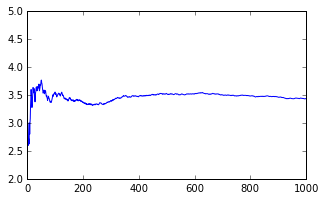

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

# 平均の計算
dice = randint(1,7,1000)
result = []
for i in range(1, 1001):
    sample = dice[:i]
    result.append(np.mean(sample))

fig = plt.figure(figsize=(5, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim(2, 5)
subplot.plot(result)
plt.show()

# コイン投げ

1 回分のゲームをシミュレーションする関数を用意する.

手持ちのポイントと賭けるポイントを渡すとゲームの結果に応じて増減した後の手持ちのポイントが返るようにする.

毎回 10 ポイント賭けるという戦略で 100 回分ゲームを繰り返す.
その結果で手持ちのポイントがどう変わるかをグラフに描く.

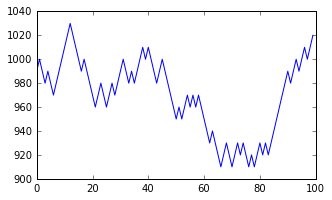

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

def coin_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= bet
    return money

money = 1000
result = []
for i in range(100):
    # 10 ポイントごと賭ける
    money = coin_game(money, 10)
    result.append(money)

fig = plt.figure(figsize=(5,3))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(result)), result)
plt.show()

毎回手持ちのポイントの半分を賭けるという戦略を取って 100 回ゲームする.
その結果手持ちのポイントがどう変わるかをグラフに描く.

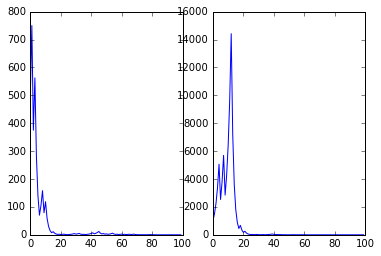

In [22]:
# 関数を引き継いでいるので前のセルを読み込むこと!

money = 1000
result1 = []
for i in range(100):
    # 半分ごと賭ける
    money = coin_game(money, money/2)
    result1.append(money)
 
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(range(len(result1)), result1)

# 賭ける
money = 1000
result2 = []
for i in range(100):
    result2.append(money)
    # 半分ごと賭ける
    money = coin_game(money, money/2)

ax2.plot(range(len(result2)), result2)

# 株の値動きのシミュレーションのようなもの

## 1 回分のゲームをシミュレーション

手持ちのポイントは賭けたポイントの分だけ増えるか, 賭けたポイントの半分だけ減る.

毎回 10 ポイント賭ける戦略で 100 回ゲームを繰り返す.
手持ちのポイントがどう変わるかグラフで描く.

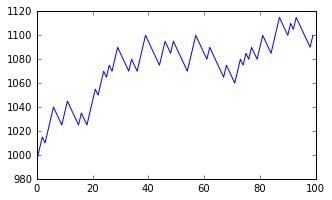

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

def coin_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= bet / 2
    return money

money = 1000
result = []
for i in range(100):
    money = coin_game(money, 10)
    result.append(money)

fig = plt.figure(figsize=(5,3))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(result)), result)
plt.show()

## 毎回手持ちのポイントを半分賭ける

100 回ゲームを繰り返す.
手持ちのポイントがどう変わるかをグラフで描く.

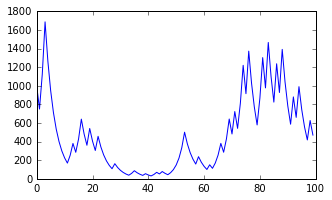

In [29]:
# 関数を持ち越しているので前のセルを読み込むこと!

money = 1000
result = []
for i in range(100):
    result.append(money)
    money = coin_game(money, money / 2)

fig = plt.figure(figsize=(5, 3))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(range(len(result)), result)
plt.show()